<a href="https://colab.research.google.com/github/Aditya3523/Minor_Project2/blob/main/MINOR_PROJECT_2_(Aditya_S%2C_Aryan_N).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
airtel = "https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/BHARTIARTL.csv"
tatasteel = "https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/TATASTEEL.csv"
nestle = "https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/NESTLEIND.csv"

In [ ]:
import pandas as pd
import numpy as np

# List of CSV files for each company's stock data
csv_files = [airtel]

# Read and preprocess the data for each CSV file
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])

    # Perform data cleaning and preprocessing
    # For example, handle missing values, format columns, etc.
    # You can add your own preprocessing steps based on your dataset

    dataframes.append(df)

# Combine the dataframes for each company into a single portfolio dataset
portfolio_data = pd.concat(dataframes)

# Display the portfolio dataset
portfolio_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920


In [ ]:
portfolio_data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4774,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4774.000000,4.774000e+03,4.774000e+03,2456.000000,4.758000e+03,4758.000000
mean,2011-09-12 06:58:03.870967552,379.688333,380.478456,387.034761,372.705216,379.798502,379.800765,379.824874,5.341070e+06,2.245218e+14,85133.370114,2.653730e+06,0.521711
min,2002-02-18 00:00:00,0.000000,21.100000,21.600000,20.650000,20.700000,20.750000,20.960000,2.824600e+04,7.373966e+10,1392.000000,1.830100e+04,0.071900
25%,2006-11-14 06:00:00,301.325000,302.000000,306.825000,296.575000,301.162500,301.400000,301.390000,1.838864e+06,5.580891e+13,43331.000000,8.125398e+05,0.417850
50%,2011-09-08 12:00:00,348.800000,349.000000,353.925000,343.500000,348.575000,348.800000,348.750000,3.474614e+06,1.268449e+14,62231.500000,1.793994e+06,0.530000
75%,2016-07-03 06:00:00,423.850000,425.000000,431.312500,417.250000,423.275000,423.937500,424.297500,5.922892e+06,2.382761e+14,97361.750000,3.254393e+06,0.628475
max,2021-04-30 00:00:00,1125.650000,1133.900000,1184.200000,1090.250000,1131.350000,1125.650000,1113.580000,1.948880e+08,1.090756e+16,946705.000000,1.229199e+08,0.999800
std,NaN,207.237329,207.774041,212.037403,202.270599,207.163319,207.176886,206.953021,7.976471e+06,4.014405e+14,75136.125261,4.016530e+06,0.148377


In [ ]:
print(portfolio_data.columns)
portfolio_data.shape

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


(4774, 15)

In [ ]:
portfolio_data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2318
Deliverable Volume      16
%Deliverble             16
dtype: int64

In [ ]:
# Fill missing values with the mean
portfolio_data['Trades'].fillna(portfolio_data['Trades'].median(), inplace=True)
portfolio_data['Deliverable Volume'].fillna(portfolio_data['Deliverable Volume'].mean(), inplace=True)
portfolio_data['%Deliverble'].fillna(portfolio_data['%Deliverble'].mean(), inplace=True)
portfolio_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,62231.5,6.503775e+06,0.626500
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,62231.5,1.741184e+06,0.490100
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,62231.5,2.653730e+06,0.521711
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,62231.5,4.859690e+05,0.363200
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,62231.5,3.991330e+05,0.492000


In [ ]:
# Calculate portfolio returns, volatility, and other performance metrics
combined_data = portfolio_data

# Calculate daily returns for each stock
combined_data['Returns'] = combined_data.groupby('Symbol')['Close'].pct_change()
combined_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Returns
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,62231.5,6.503775e+06,0.626500,NaN
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,62231.5,1.741184e+06,0.490100,-0.059752
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,62231.5,2.653730e+06,0.521711,-0.010791
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,62231.5,4.859690e+05,0.363200,0.027879
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,62231.5,3.991330e+05,0.492000,0.021226


In [ ]:
combined_data['Returns'].fillna(combined_data['Returns'].median(), inplace=True)

In [ ]:
# Calculate portfolio returns as the weighted average of individual stock returns
portfolio_returns = combined_data.groupby('Date')['Returns'].mean()
portfolio_returns

Date
2002-02-18   -0.000234
2002-02-19   -0.059752
2002-02-20   -0.010791
2002-02-21    0.027879
2002-02-22    0.021226
                ...   
2021-04-26    0.009472
2021-04-27    0.012795
2021-04-28    0.018716
2021-04-29   -0.006338
2021-04-30   -0.007581
Name: Returns, Length: 4774, dtype: float64

In [ ]:
# Calculate portfolio volatility using standard deviation, If there are multiple stocks then it will show Data else 0
portfolio_volatility = combined_data.groupby('Date')['Returns'].std().fillna(0)
portfolio_volatility

Date
2002-02-18    0.0
2002-02-19    0.0
2002-02-20    0.0
2002-02-21    0.0
2002-02-22    0.0
             ... 
2021-04-26    0.0
2021-04-27    0.0
2021-04-28    0.0
2021-04-29    0.0
2021-04-30    0.0
Name: Returns, Length: 4774, dtype: float64

In [ ]:
# There are typically 252 trading days in a year (considering weekends and holidays).

# Calculate daily risk-free rate (e.g., Treasury bill rate)
risk_free_rate = 0.03 / 252

portfolio_returns = pd.DataFrame(portfolio_returns).reset_index()

# Calculate excess returns of the portfolio
portfolio_excess_returns = portfolio_returns['Returns'] - risk_free_rate

# Calculate portfolio standard deviation (volatility)
portfolio_volatility = combined_data.groupby('Date')['Returns'].std()

# Calculate portfolio Sharpe ratio
portfolio_sharpe_ratio = (portfolio_excess_returns.mean() / portfolio_volatility) * np.sqrt(252)

# Calculate portfolio beta
covariance_matrix = combined_data.groupby('Symbol')['Returns'].cov(combined_data['Returns'])
portfolio_beta = covariance_matrix / combined_data['Returns'].var()

# Print the calculated metrics
print("Portfolio Sharpe Ratio:", portfolio_sharpe_ratio)
print("Portfolio Beta:", portfolio_beta)

Portfolio Sharpe Ratio: Date
2002-02-18   NaN
2002-02-19   NaN
2002-02-20   NaN
2002-02-21   NaN
2002-02-22   NaN
              ..
2021-04-26   NaN
2021-04-27   NaN
2021-04-28   NaN
2021-04-29   NaN
2021-04-30   NaN
Name: Returns, Length: 4774, dtype: float64
Portfolio Beta: Symbol
BHARTI        1.251492
BHARTIARTL    0.924680
Name: Returns, dtype: float64


In [ ]:
# Calculate portfolio alpha
portfolio_beta = pd.DataFrame(portfolio_beta).reset_index()
portfolio_beta.rename(columns={'Returns': 'Beta'}, inplace=True)
combined_data_with_beta = combined_data.merge(portfolio_beta, on='Symbol', how='left')

# Calculate portfolio alpha
portfolio_alpha = portfolio_excess_returns - (combined_data_with_beta['Beta'].values * (combined_data['Returns'] - risk_free_rate).values)
print("Portfolio Alpha:", portfolio_alpha)

Portfolio Alpha: 0       0.000089
1       0.015057
2       0.002744
3      -0.006981
4      -0.005308
          ...   
4769    0.000704
4770    0.000955
4771    0.001401
4772   -0.000486
4773   -0.000580
Name: Returns, Length: 4774, dtype: float64


In [ ]:
portfolio_alpha = pd.DataFrame(portfolio_alpha).reset_index()
portfolio_alpha.rename(columns={'Returns': 'Alpha'}, inplace=True)

combined_data_with_beta = combined_data_with_beta.reset_index()
combined_data_final = combined_data_with_beta.merge(portfolio_alpha, on='index', how='left')

final_df = combined_data_final.drop('index',axis=1)
final_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Returns,Beta,Alpha
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,62231.5,6.503775e+06,0.626500,-0.000234,1.251492,0.000089
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,62231.5,1.741184e+06,0.490100,-0.059752,1.251492,0.015057
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,62231.5,2.653730e+06,0.521711,-0.010791,1.251492,0.002744
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,62231.5,4.859690e+05,0.363200,0.027879,1.251492,-0.006981
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,62231.5,3.991330e+05,0.492000,0.021226,1.251492,-0.005308


In [ ]:
# Portfolio Returns Plot
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=portfolio_returns['Date'], y=portfolio_returns['Returns'], mode='lines'))
fig.update_layout(title='Returns Plot', xaxis_title='Date', yaxis_title='Returns')
fig.show()

In [ ]:
# Bar chart for Alpha
fig_alpha = go.Figure(data=go.Scatter(x=final_df['Date'], y=final_df['Alpha']))
fig_alpha.update_layout(title='Portfolio Alpha', xaxis_title='Date', yaxis_title='Alpha')
fig_alpha.show()

Root Mean Squared Error: 106.11321154679129


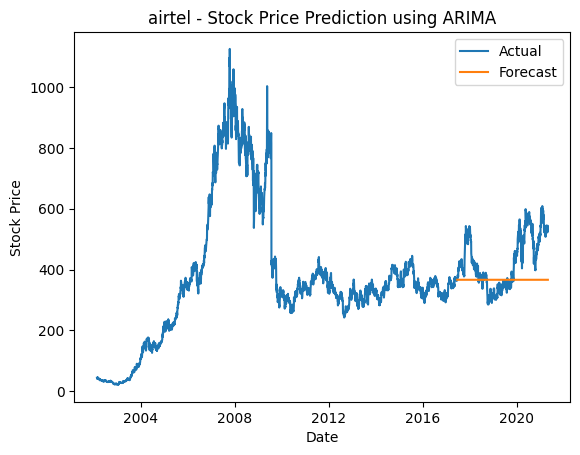

Root Mean Squared Error: 153.23915536026567


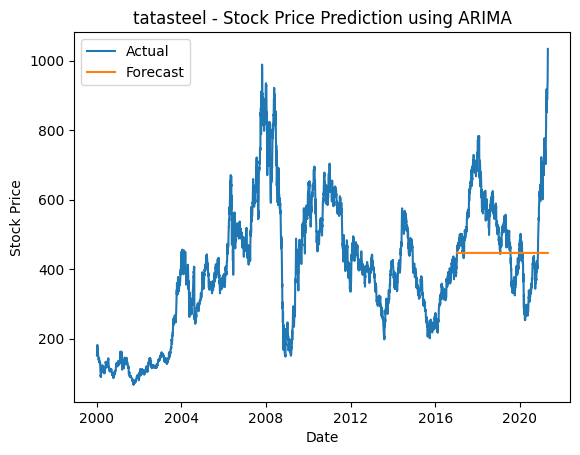

Root Mean Squared Error: 4351.509746815834


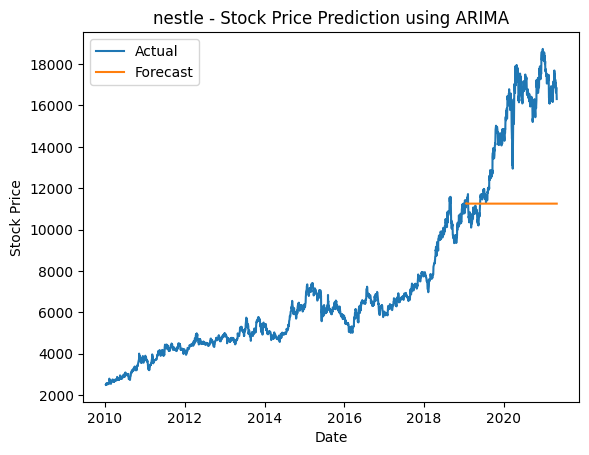

Root Mean Squared Error: 1405.934215277624


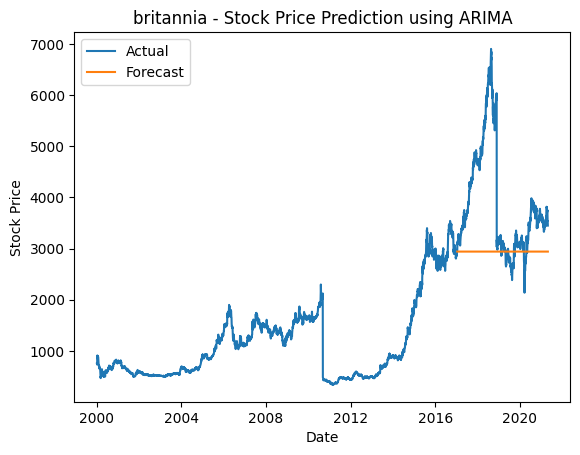

Root Mean Squared Error: 101.2286074549655


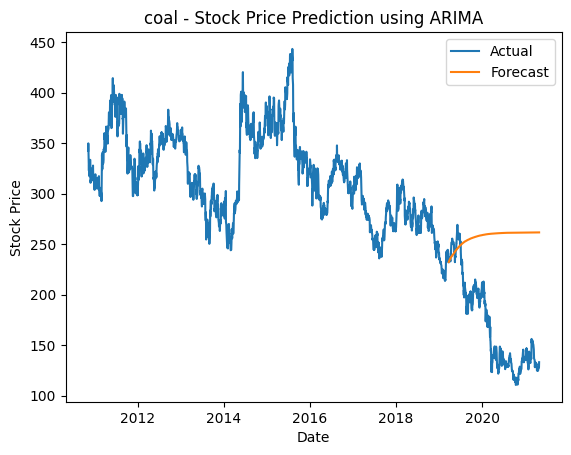

Root Mean Squared Error: 145.792700273085


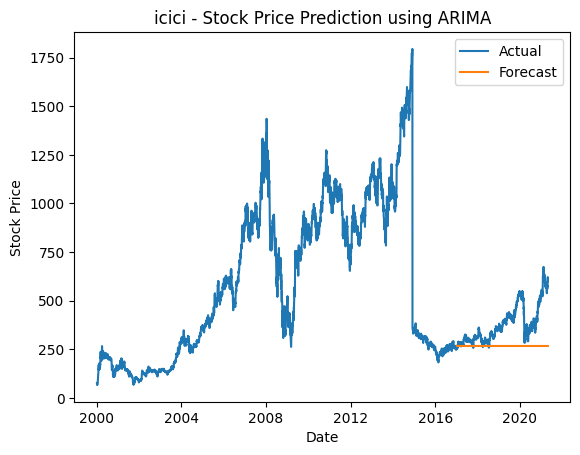

Root Mean Squared Error: 679.5725304560635


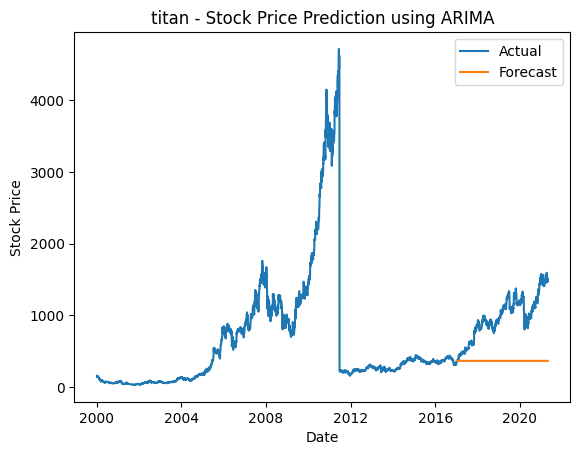

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


def predictStock(url,stock):
  df = pd.read_csv(url)
  df['Date'] = pd.to_datetime(df['Date'])
  # Set the 'Date' column as the index
  df = df.set_index('Date')

  # Select the 'Close' column for the stock price
  data = df['Close']

  # Split the data into training and testing sets
  train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

  # Fit the ARIMA model to the training data and tune the model parameters
  model = ARIMA(train_data, order=(2, 1, 2))  # Example order (p, d, q)
  model_fit = model.fit()

  # Forecast future stock prices using the trained model
  start_index = len(train_data)
  end_index = len(train_data) + len(test_data) - 1
  forecast = model_fit.predict(start=start_index, end=end_index)

  # Evaluate the predictions
  mse = mean_squared_error(test_data, forecast)
  rmse = np.sqrt(mse)
  print("Root Mean Squared Error:", rmse)

  # Plot the actual stock prices and the predicted values
  plt.plot(df.index, data, label='Actual')
  plt.plot(test_data.index, forecast, label='Forecast')
  plt.xlabel('Date')
  plt.ylabel('Stock Price')
  plt.title(f'{stock} - Stock Price Prediction using ARIMA')
  plt.legend()
  plt.show()


# Define the URLs for the stock data
urls = {
    'airtel': 'https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/BHARTIARTL.csv',
    'tatasteel': 'https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/TATASTEEL.csv',
    'nestle': 'https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/NESTLEIND.csv',
    'britannia': 'https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/BRITANNIA.csv',
    'coal': 'https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/COALINDIA.csv',
    'icici': 'https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/ICICIBANK.csv',
    'titan': 'https://raw.githubusercontent.com/Aditya3523/Minor_Project2/main/TITAN.csv'
}
for stock, url in urls.items():
  predictStock(url,stock)